# 데이터 전처리

In [5]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
28*28

784

In [23]:
# MinMaxScaling
# dtype 변환

X = (X_train/255).astype("float32")
T = (X_test/255).astype("float32")

In [9]:
# MinMaxScaling
# flatten
# dtype 변환

X_ = (X_train/255).reshape(-1, 28*28).astype("float32")
T_ = (X_test/255).reshape(-1, 28*28).astype("float32")

# AutoEncoder 만들기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

# classification으로 하는 방법

In [25]:
layer1 = Dense(64, activation="relu", input_shape=(784,))
layer2 = Dense(32, activation="relu")
layer3 = Dense(8, activation="relu")
layer4 = Dense(32, activation="relu")
layer5 = Dense(64, activation="relu")
layer6 = Dense(784, activation="sigmoid")

model1 = Sequential([layer1,
                     layer2,
                     layer3,
                     layer4,
                     layer5,
                     layer6,
                     ])

In [26]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 784)               50960     
Total params: 105,944
Trainable params: 105,944
Non-trainable params: 0
________________________________________________

In [27]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [28]:
histoy1 = model1.fit(X_, X_, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2091 - acc: 0.7933
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1569 - acc: 0.8029
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1493 - acc: 0.8043
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1453 - acc: 0.8050
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1425 - acc: 0.8055
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1404 - acc: 0.8059
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1390 - acc: 0.8061
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1380 - acc: 0.8063
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1372 - acc: 0.8065
Epoch 10/10
60000/60000 [==============================] - 

In [20]:
def compare(data, model):
    predictions = model.predict(data)
    for x, pred in zip(data, predictions):
        
        x = x.reshape(28,28)
        pred = pred.reshape(28,28)
        
        plt.figure(figsize=(8,4))
        ax1 = plt.subplot(1,2,1)
        ax1.imshow(pred)
        ax1.set_title("predictied")

        ax2 = plt.subplot(1,2,2)
        ax2.imshow(x)
        ax2.set_title("origin")

        plt.show()

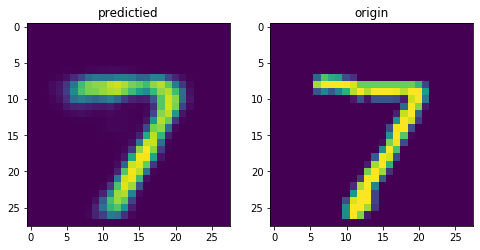

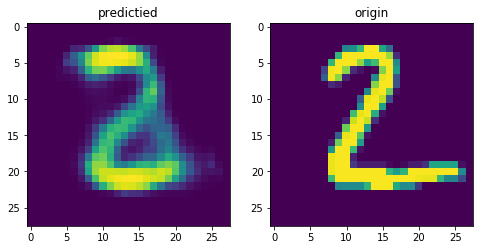

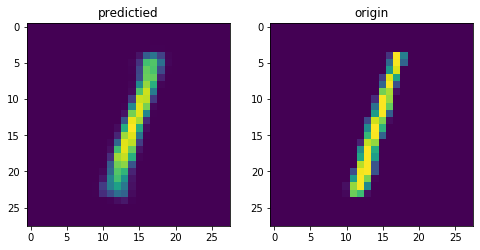

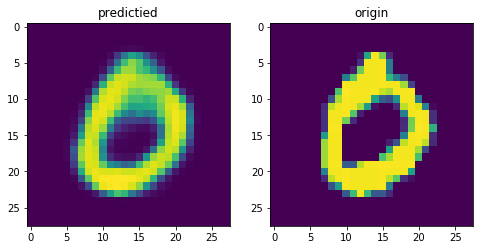

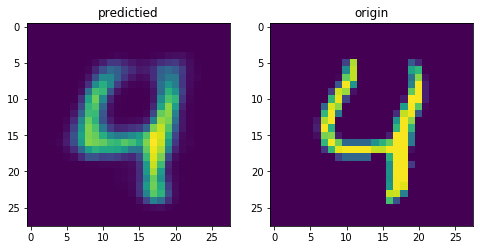

In [30]:
compare(T_[:5], model1)

# regression으로 하는 방법

In [36]:
encoder = Sequential([Dense(64, input_shape=(28,28), activation="relu"),
                    Dense(32, activation="relu"),
                    Dense(8, activation="relu")],
                    name="encoder")

In [37]:
decoder = Sequential([Dense(32, input_shape=encoder.output_shape[1:], activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(28)],
                     name="decoder")

In [43]:
model2 = Sequential()
model2.add(encoder)
model2.add(decoder)

In [44]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 28, 8)             4200      
_________________________________________________________________
decoder (Sequential)         (None, 28, 28)            4220      
Total params: 8,420
Trainable params: 8,420
Non-trainable params: 0
_________________________________________________________________


> layer 대신에 모델을 넣어도 모델을 만들 수 있다.

In [45]:
model2.output_shape

(None, 28, 28)

In [46]:
model2.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [47]:
# flatten 안 시킨 데이터로 학습

history2 = model2.fit(X, X, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0028 - mse: 0.0028
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0025 - mse: 0.0025
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0024 - mse: 0.0024
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0023 - mse: 0.0023
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0022 - mse: 0.0022


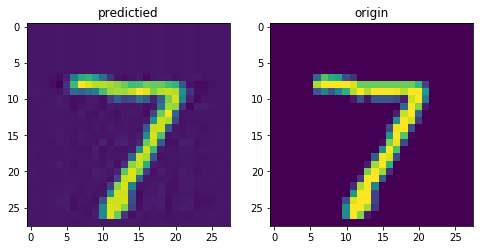

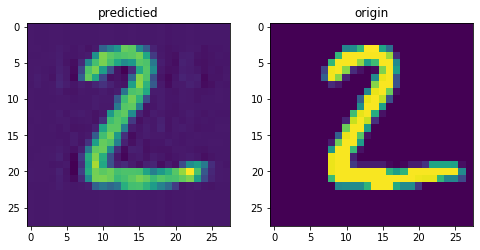

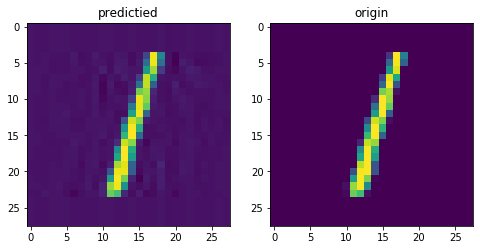

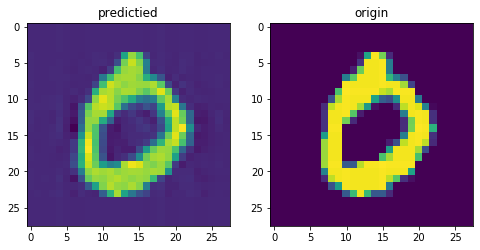

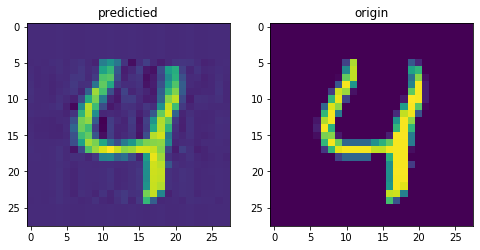

In [56]:
compare(T[:5], model2)

# encoder 마지막 레이어에 relu를 안 넣었을 때의 성능 차이

In [61]:
layer1 = Dense(128, activation="relu", input_shape=(784,))
layer2 = Dense(64, activation="relu")
layer3 = Dense(32, activation="relu")
layer4 = Dense(16, activation="relu")
layer5 = Dense(8)

seq1 = Sequential([layer1, layer2, layer3, layer4, layer5], name="seq1")

layer6 = Dense(16, activation="relu")
layer7 = Dense(32, activation="relu")
layer8 = Dense(64, activation="relu")
layer9 = Dense(128, activation="relu")
layer10 = Dense(784, activation="sigmoid")
seq2 = Sequential([layer6, layer7, layer8, layer9, layer10], name="seq2")

In [62]:
seq3 = Sequential(name="seq3")
seq3.add(seq1)
seq3.add(seq2)

In [63]:
seq3.summary()

Model: "seq3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
seq1 (Sequential)            (None, 8)                 111480    
_________________________________________________________________
seq2 (Sequential)            (None, 784)               112256    
Total params: 223,736
Trainable params: 223,736
Non-trainable params: 0
_________________________________________________________________


In [64]:
seq3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [65]:
history3 = seq3.fit(X_, X_, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2133 - acc: 0.7937
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1538 - acc: 0.8028
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1449 - acc: 0.8047
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1399 - acc: 0.8058
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1348 - acc: 0.8069
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1316 - acc: 0.8074
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1292 - acc: 0.8078
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1267 - acc: 0.8083
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1246 - acc: 0.8086
Epoch 10/10
60000/60000 [==============================] - 

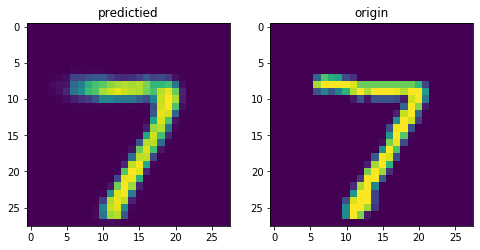

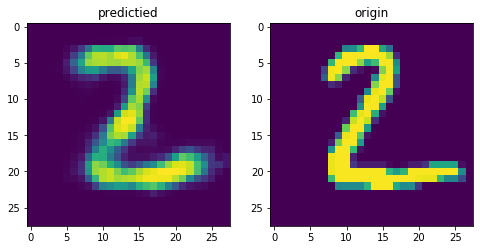

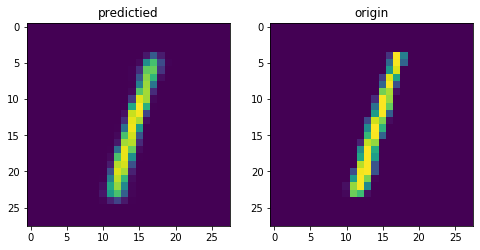

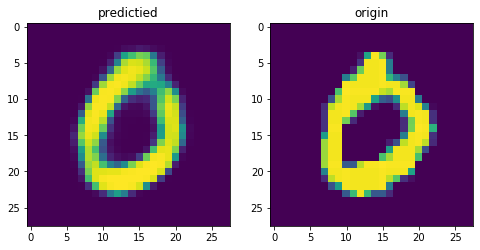

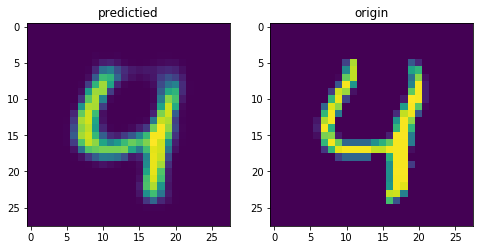

In [66]:
compare(T_[:5], seq3)

> 마지막에 relu를 넣으나 빼나 차이가 없다(맞나?)

# decoder만 꺼내와서 임의의 이미지 생성하기

In [67]:
seq1_trained, seq2_trained = seq3.layers

In [68]:
seq2_trained.input_shape

(None, 8)

In [69]:
dummy = np.array([[1,2,3,4,5,6,7,8]])
# dummy = np.empty((1,8), np.float32)

In [70]:
def minmax(data):
    return (data - np.min(data))/(np.max(data)-np.min(data))

In [71]:
minmax(dummy)

array([[0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]])

In [72]:
pred_dummy = seq2_trained(dummy)

In [73]:
pred_dummy.shape

TensorShape([1, 784])

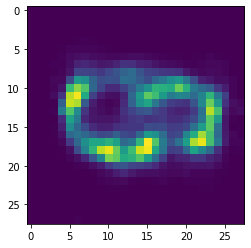

In [74]:
plt.imshow(pred_dummy.numpy().reshape(28,28))
plt.show()

> - 아무 숫자나 넣으면 이미지를 생성해준다.
- 이미지 생성기로 decoder를 쓸 수 있다.
- 흐릿하게 나오는게 특징이다.

---

# keras 튜토리얼 보면서 공부
https://blog.keras.io/building-autoencoders-in-keras.html

# Conv 로 바꿔서 해보기

In [75]:
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D, Input, Conv2D

In [76]:
from tensorflow.keras.models import Model

In [80]:
# 이번엔 함수형 API로 해보기
# autoencoder 종류 중 stacked 방법으로 만들어 보기
# 위에서 dense로 해볼 때는 sparse 방법으로 만들었던 것이었던 것이다.

input_data = Input((28,28,1))
encoded = Conv2D(128, (3,3), padding="same")(input_data)
encoded = MaxPooling2D((2,2), padding="same")(encoded)
encoded = Conv2D(64, (3,3), padding="same")(encoded)
encoded = MaxPooling2D((2,2), padding="same")(encoded)
encoded = Conv2D(16, (3,3), padding="same")(encoded)
encoded = MaxPooling2D((2,2), padding="same")(encoded)

decoded = Conv2D(16, (3,3), padding="same")(encoded) # stacked 방식!
decoded = UpSampling2D((2,2))(decoded)
decoded = Conv2D(64, (3,3), padding="same")(decoded)
decoded = UpSampling2D((2,2))(decoded)
decoded = Conv2D(128, (3,3))(decoded)  # padding="same"을 빼줘야 한다.
decoded = UpSampling2D((2,2))(decoded)
decoded = Conv2D(1, (3,3), padding="same")(decoded) # input과 output을 맞춰주는 역할을 함. (channel=1)

autoencoder = Model(input_data, decoded, name="autoencoder")

In [81]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          9232      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          

In [83]:
autoencoder.compile(loss="mse", optimizer="adam")

In [84]:
X_ch1 = X_train.astype("float32")/255
X_ch1 = X_ch1.reshape(-1, 28,28,1)
X_ch1.shape

(60000, 28, 28, 1)

In [86]:
histoy = autoencoder.fit(X_ch1, X_ch1, batch_size=32*4, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 439s 7ms/sample - loss: 0.0378
Epoch 2/5
60000/60000 [==============================] - 437s 7ms/sample - loss: 0.0244
Epoch 3/5
60000/60000 [==============================] - 436s 7ms/sample - loss: 0.0208
Epoch 4/5
60000/60000 [==============================] - 434s 7ms/sample - loss: 0.0186
Epoch 5/5
60000/60000 [==============================] - 456s 8ms/sample - loss: 0.0172


In [87]:
T_ch1 = X_test.astype("float32")/255
T_ch1 = T_ch1.reshape(-1, 28,28,1)
T_ch1.shape

(10000, 28, 28, 1)

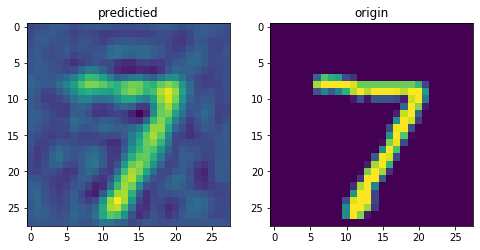

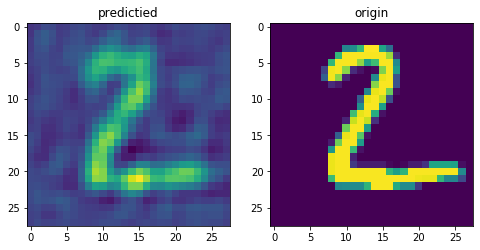

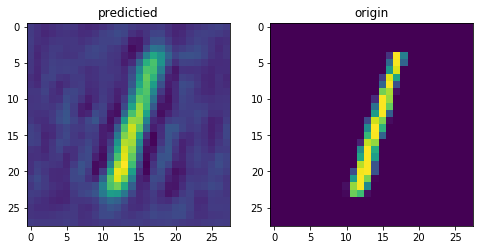

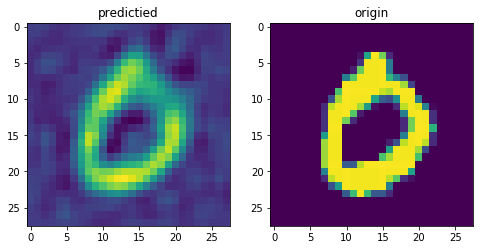

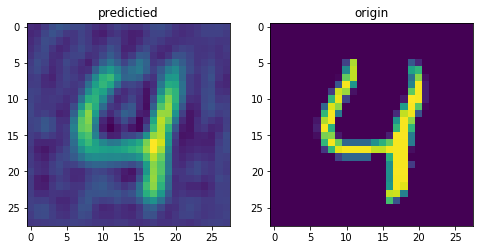

In [88]:
compare(T_ch1[:5], autoencoder)

> - Covoloution으로 바꿔도 잘 된다.
- Dense가 잘 되면 Convolution으로 시도해보자.